In [38]:
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
Annual_Gold_Value_In_Euros = pd.read_csv('Resources/Gold_Price_Euro_Conversion(2013-2022).csv')
Inflation_rates_2013_2021 = pd.read_csv('Resources/inflation_rates_2013-2021.csv')
European_inflation = Inflation_rates_2013_2021[Inflation_rates_2013_2021['country'] == 'European Union']

In [40]:
#def calculate_percent_change(data, year_column, value_column):
    #percent_change = {}
    #for i in range(1, len(data)):
        #old_value = data[value_column].iloc[i - 1]
        #new_value = data[value_column].iloc[i]
        #print(f"old_value: {old_value}, new_value: {new_value}")
        #change = ((new_value - old_value) / old_value * 100)
        #percent_change[data[year_column].iloc[i]] = change
    #return percent_change

In [41]:
#def euro_inflation_creation(data):
    #euro_inflation_made = {}
    #for i in range(len(data)):
        #year = data['year'].iloc[i]
        #inflation_rate = data['inflation rate'].iloc[i]
        #euro_inflation_made[year] = inflation_rate
    #return euro_inflation_made    

In [42]:
def calculate_currency_change(data, year_column, value_column):
    currency_change = {}
    for i in range(1, len(data)):
        old_value = data[value_column].iloc[i - 1]
        new_value = data[value_column].iloc[i]
        change = new_value - old_value
        currency_change[data[year_column].iloc[i]] = change
    return currency_change

In [43]:
def euro_inflation_creation(data):
    euro_inflation_made = {}
    for i in range(len(data)):
        year = data['year'].iloc[i]
        inflation_rate = data['inflation rate'].iloc[i]
        currency_change = 1 + (inflation_rate / 100)
        euro_inflation_made[year] = inflation_rate
    return euro_inflation_made    

In [48]:
euro_inflation_change = euro_inflation_creation(European_inflation)
percent_change_gold = calculate_percent_change(Annual_Gold_Value_In_Euros, 'Year', 'Gold_Price_Euros')

euro_currency_change = euro_inflation_creation(Inflation_rates_2013_2021)
currency_change_gold = calculate_currency_change(Annual_Gold_Value_In_Euros, 'Year', 'Gold_Price_Euros')
print(euro_currency_change)
print(currency_change_gold)

old_value: 1061.169284460932, new_value: 952.7160419903792
old_value: 952.7160419903792, new_value: 1044.1484800037754
old_value: 1044.1484800037754, new_value: 1130.0802166003728
old_value: 1130.0802166003728, new_value: 1116.120355695111
old_value: 1116.120355695111, new_value: 1076.6595614982434
old_value: 1076.6595614982434, new_value: 1248.2040487007366
old_value: 1248.2040487007366, new_value: 1557.743163965801
old_value: 1557.743163965801, new_value: 1521.0833043159707
old_value: 1521.0833043159707, new_value: 1712.8468886239857
{2013: 1.464832656, 2014: 1.622222977, 2015: 0.118627136, 2016: 1.261583206, 2017: 2.130110004, 2018: 2.442583297, 2019: 1.812210075, 2020: 1.233584396, 2021: 4.697858864}
{2014: -108.45324247055282, 2015: 91.43243801339622, 2016: 85.93173659659737, 2017: -13.959860905261849, 2018: -39.46079419686748, 2019: 171.5444872024932, 2020: 309.5391152650643, 2021: -36.659859649830196, 2022: 191.76358430801497}


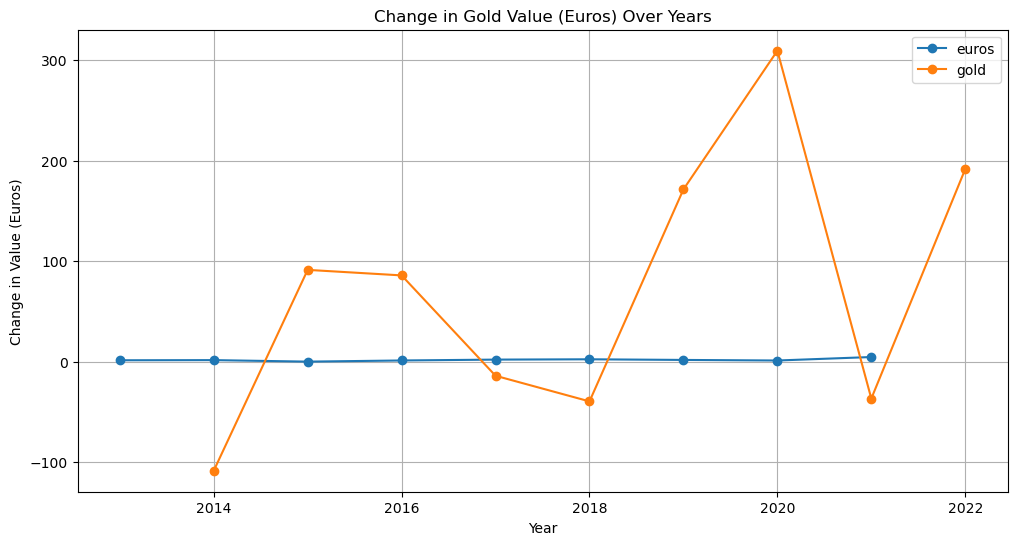

In [47]:
plt.figure(figsize=(12, 6), label = 'InPercentages')

#plt.plot(percent_change_gold.keys(), percent_change_gold.values(), marker='o', linestyle='-', label='gold')
#plt.plot(euro_inflation_change.keys(), euro_inflation_change.values(), marker='o', linestyle='-', label='Euros')
plt.plot(euro_currency_change.keys(), euro_currency_change.values(), marker='o', linestyle='-', label='euros')
plt.plot(currency_change_gold.keys(), currency_change_gold.values(), marker='o', linestyle='-', label='gold')


#for year, rate in percent_change_gold.items():
    #plt.text(year, rate, f'{rate:.2f}', ha='left', va='center', fontsize=8, color='blue')
#for year, rate in euro_inflation_change.items():
    #plt.text(year, rate, f'{rate:.2f}', ha='left', va='center', fontsize=8, color='blue')
#for year, rate in euro_currency_change.items():
    #plt.text(year, rate, f'{rate:.2f}', ha='left', va='center', fontsize=8, color='blue')
#for year, rate in currency_change_gold.items():
    #plt.text(year, rate, f'{rate:.2f}', ha='left', va='center', fontsize=8, color='blue')

plt.title('Change in Gold Value (Euros) Over Years')
plt.xlabel('Year')
plt.ylabel('Change in Value (Euros)')
plt.legend()
plt.grid(True)
plt.show()